# Machine Learning A-Z Python

## Regression

## Part 5. Decision Tree Regression (Non-linear regression) 

### Criteria: For NON-linear regression | NON-continuous problems 

In [19]:
# Data Preprocessing
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset.head(10))

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [20]:
# Independent variable: Level, Dependent variable: Salary
X=dataset.iloc[:,1:-1].values # all independent variables
# Don't require position column, it is similar to level column
X.shape

(10, 1)

In case of only 1 column as we saw in simple linear regression or polynomial regression,
we have to use `[:-1]` for column selection in X because we want X to form a matrix.
Where as y should be (10,) because we want it to be a vector and not matrix

In [21]:
y=dataset.iloc[:,-1].values # dependent variables
y.shape

(10,)

In [22]:
print(X[:5]) # confirm it do NOT have dependent variable 
print('------------------------------------')
print(y[:5]) # confirm it only contain  dependent variable
print(X.ndim, y.ndim)

[[1]
 [2]
 [3]
 [4]
 [5]]
------------------------------------
[ 45000  50000  60000  80000 110000]
2 1


In [7]:
# No missing data and no categorical columns
# Rare case of not splitting data as we have sparse observation
# NO Feature scaling here

In [24]:
# Fitting DecisionTree Regression to dataset: 
from sklearn.tree import DecisionTreeRegressor # DecisionTreeRegressor class 
# regressor is an object of DecisionTreeRegressor class
regressor = DecisionTreeRegressor(random_state=0) 

regressor.fit(X, y) # fitting object to X and y as we didn't split the data

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf='deprecated',
           min_samples_split=2, min_weight_fraction_leaf='deprecated',
           presort=False, random_state=0, splitter='best')

In [25]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([150000.])

**First prediction without any optimization (standardization/scaling), and the prediction is reasonable**

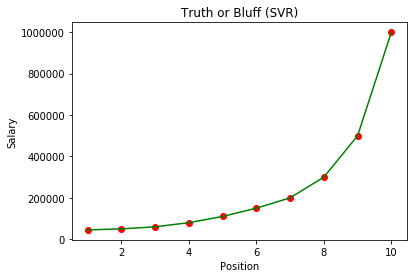

In [24]:
# Visualizing the DecisionTree  results 
plt.scatter(X, y, color='red')

# To plot the DecisionTree  results 
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

### RED FLAG:

**Decision Tree regression model do NOT look like this.** Here it seems to have a positive slope between intervals whereas according to decision tree, value between 2 intervals should be not change.

DecisionTree (DT) regression model split the independent variable into several intervals. If there are 2 independent variables, it form a rectangle after being splitted by DT. But here, there is 1 independent variable (1-Dimension) and  thus the interval will be along the X axis eg- interval between 1&2, 2&3, 3&4 etc. And the values corrosponding to each interval should be constant. In video we saw it took dependent variable average at each terminal leaf, and assigning that value to any new point that fall inside that range. That way here we should not have a line with +ve slope between intervals (unlike continuous regression cases we see like linear, multiple linear, polynomial, SVR). Technically, DT regression should calculate the average value between each interval like 1 and 2, 3 and 4. And the line between 1 and 2, 3 and 4 etc should be more like a step and not one with a +ve slope.

It is predicting the salary at each interval and then joining the predictions with a straight line (as they have no predicted points between 2 intervals) and hence it look continuous. It was ok with linear or similar regressions as the value they are predicting is continuous. But DT regression model is NOT continuous (it is rather constant predicted value between 2 intervals. eg- interval between 5.5 and 6.5 is earning $150k). And thus we can **remove the problem by plotting it in higher resolution.**

In [26]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset.head(10))

# Independent variable: Level, Dependent variable: Salary
X=dataset.iloc[:,1:-1].values # all independent variables
# Don't require position column, it is similar to level column
y=dataset.iloc[:,-1].values # dependent variables
X.shape, y.shape

print(X[:5]) # confirm it do NOT have dependent variable 
print('------------------------------------')
print(y[:5]) # confirm it only contain  dependent variable

# Fitting DecisionTree Regression to dataset: 
from sklearn.tree import DecisionTreeRegressor # DecisionTreeRegressor class 
regressor = DecisionTreeRegressor(random_state=0) 
# regressor object of DecisionTreeRegressor class
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[1]
 [2]
 [3]
 [4]
 [5]]
------------------------------------
[ 45000  50000  60000  80000 110000]


array([150000.])

### Following is the solution for DT regression model for continuous line

(90,)
(90, 1)


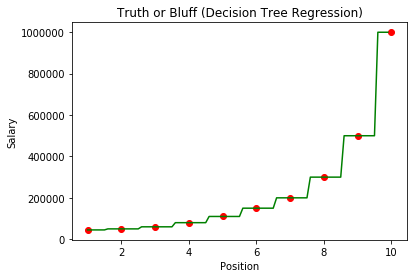

In [27]:
# Visualizing the DT Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X),max(X),0.1) 
print (X_grid.shape)
# But this will give a vector and for X we want matrix and therefore reshape:
X_grid = X_grid.reshape(len(X_grid),1)
print (X_grid.shape)

# Visualizing the DT Regression results 
plt.scatter(X, y, color='red')
# To plot the DT Regression results 
plt.plot(X_grid, regressor.predict(X_grid), color='green')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

For a non-continuous model like DT regression model, we should have a more strictly vertical line (unlike last one which is close to vertical). And we can do that by reducing the step size (or increasing the resolution) further, which in turn improve the vertical line.

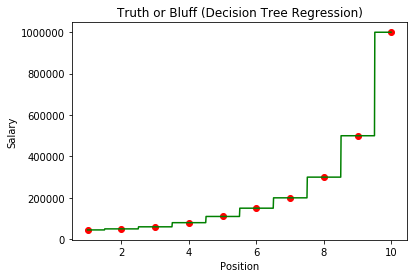

In [28]:
# More strict Vertical lines:Visualizing the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X),max(X),0.01) 
X_grid = X_grid.reshape(len(X_grid),1)

# Visualizing the DT Regression results
plt.scatter(X, y, color='red')
# To plot the DT Regression results
plt.plot(X_grid, regressor.predict(X_grid), color='green')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

** MORE STRICT VERTICAL LINE** :  Characteristic DecisionTree Regression model.

**DT Regression model consider average value of dependent variable in the interval.** Thus, we can see the constant value in each interval. Like anyone between level 5.5 and 6.5, will have a predicted salary of 150k dollars.

DecisionTree Regression model is NOT an interesting/ powerful model in 1-D (like here). But it becomes powerful when more dimensions are added (more independent variables are added).